### This script contains the following:

#### 1. Importing Visualization Libraries and Data
#### 2. Data Cleaning
#### 3. Exploring Relationships
     Correlations
     Scatterplots
     Pair Plots
     Categorical Plots

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
from scipy import stats

In [2]:
matplotlib.__version__

'3.7.1'

In [3]:
%matplotlib inline

In [4]:
# Define path
path = r'/Users/azadeh/Documents/CitiBike Data Quest/'

In [5]:
# Import Data
df = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'citibike.csv'), index_col = False)

### 2. Data Cleaning

#### Renaming Columns:

In [6]:
df.shape

(50000, 18)

In [7]:
df.columns
# No need to change columns name

Index(['trip_id', 'bike_id', 'weekday', 'start_hour', 'start_time',
       'start_station_id', 'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_time', 'end_station_id',
       'end_station_name', 'end_station_latitude', 'end_station_longitude',
       'trip_duration', 'subscriber', 'birth_year', 'gender'],
      dtype='object')

In [8]:
df.dtypes

trip_id                     object
bike_id                      int64
weekday                     object
start_hour                   int64
start_time                  object
start_station_id             int64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_time                    object
end_station_id               int64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
trip_duration                int64
subscriber                  object
birth_year                 float64
gender                       int64
dtype: object

In [9]:
#Convert 'bike_id' to string
df['bike_id'] = df['bike_id'].astype(str)

In [10]:
df.head()

,trip_id,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender
0,LnQzQk,16013,Mon,18,2013-09-09 18:18:55,523,W 38 St & 8 Ave,40.754666,-73.991382,2013-09-09 18:35:28,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968.0,2
1,IL9boN,15230,Thu,18,2013-09-12 18:38:53,257,Lispenard St & Broadway,40.719392,-74.002472,2013-09-12 18:48:34,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983.0,1
2,46clGB,17942,Wed,19,2013-09-18 19:44:04,479,9 Ave & W 45 St,40.760193,-73.991255,2013-09-18 19:50:05,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989.0,1
3,v7vdFt,19683,Sat,11,2013-09-28 11:54:37,527,E 33 St & 1 Ave,40.743156,-73.974347,2013-09-28 12:03:58,441,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988.0,2
4,VGBsb5,18024,Sat,18,2013-09-07 18:08:22,521,8 Ave & W 31 St,40.750450,-73.994811,2013-09-07 18:46:38,476,E 31 St & 3 Ave,40.743943,-73.979661,2296,Non-Subscriber,NaN,0


#### Missing Values Check:

In [11]:
# Check for missing values

df.isnull().sum() # 13% of birth_year data is Missing. Kept as it is!

trip_id                       0
bike_id                       0
weekday                       0
start_hour                    0
start_time                    0
start_station_id              0
start_station_name            0
start_station_latitude        0
start_station_longitude       0
end_time                      0
end_station_id                0
end_station_name              0
end_station_latitude          0
end_station_longitude         0
trip_duration                 0
subscriber                    0
birth_year                 6979
gender                        0
dtype: int64

#### Duplicates Check:

In [12]:
# Find duplicates

df_dups = df[df.duplicated()]

In [13]:
df_dups.shape # No duplicates!

(0, 18)

#### Mixed-Type Data:

In [14]:
for col in df.columns.tolist():
      weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df[weird]) > 0:
        print (col)
        
# No mixed-type columns either!

In [15]:
df.describe()

,start_hour,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,trip_duration,birth_year,gender
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,43021.000000,50000.000000
mean,14.145240,443.321500,40.734170,-73.991109,442.539700,40.733859,-73.991351,838.982900,1975.627786,1.073540
std,4.860541,356.559925,0.019911,0.012555,355.756022,0.019885,0.012569,573.663997,11.089001,0.589389
min,0.000000,72.000000,40.680342,-74.017134,72.000000,40.680342,-74.017134,60.000000,1899.000000,0.000000
25%,10.000000,304.000000,40.720196,-74.000271,304.000000,40.720196,-74.001547,417.000000,1968.000000,1.000000
50%,15.000000,402.000000,40.735877,-73.990765,402.000000,40.735354,-73.991218,672.000000,1978.000000,1.000000
75%,18.000000,484.000000,40.750020,-73.981923,483.000000,40.749013,-73.982050,1112.000000,1984.000000,1.000000
max,23.000000,3002.000000,40.770513,-73.950048,3002.000000,40.770513,-73.950048,2697.000000,1997.000000,2.000000


### 3. Exploring Relationships

### Correlations:

In [16]:
# Create a correlation matrix using pandas
#Select only the numeric columns and name it as numeric_df
numeric_df = df.select_dtypes(include=[np.number])

In [17]:
# Create a correlation matrix using pandas
correlation_matrix = numeric_df.corr()

In [18]:
numeric_df.corr()

,start_hour,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,trip_duration,birth_year,gender
start_hour,1.000000,-0.001270,-0.009121,-0.045734,0.004045,-0.036941,0.007160,0.040870,0.064253,-0.013775
start_station_id,-0.001270,1.000000,0.106504,0.082925,0.069007,0.061167,0.025818,0.061655,-0.005078,-0.036333
start_station_latitude,-0.009121,0.106504,1.000000,0.211969,0.059723,0.585463,0.078218,-0.025321,-0.045421,-0.012483
start_station_longitude,-0.045734,0.082925,0.211969,1.000000,0.024363,0.093074,0.418376,-0.007220,0.030340,0.011487
end_station_id,0.004045,0.069007,0.059723,0.024363,1.000000,0.107011,0.088185,0.059549,-0.004666,-0.045508
end_station_latitude,-0.036941,0.061167,0.585463,0.093074,0.107011,1.000000,0.200080,-0.044033,-0.041876,-0.019365
end_station_longitude,0.007160,0.025818,0.078218,0.418376,0.088185,0.200080,1.000000,0.001111,0.040611,0.000796
trip_duration,0.040870,0.061655,-0.025321,-0.007220,0.059549,-0.044033,0.001111,1.000000,-0.047118,-0.157944
birth_year,0.064253,-0.005078,-0.045421,0.030340,-0.004666,-0.041876,0.040611,-0.047118,1.000000,0.070342
gender,-0.013775,-0.036333,-0.012483,0.011487,-0.045508,-0.019365,0.000796,-0.157944,0.070342,1.000000


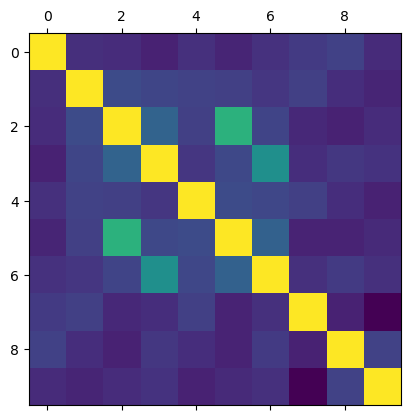

In [19]:
# Create a correlation heatmap using matplotlib

plt.matshow(numeric_df.corr())
plt.show()

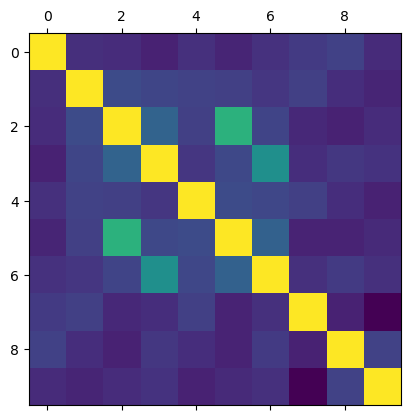

In [20]:
# Save figure
plt.matshow(numeric_df.corr())
plt.savefig("out.png") 

# This will save the image in the working directory. 
#If you don't know what this directory is the next line will show you how to check

In [21]:
#current dir
cwd = os.getcwd()
cwd

'/Users/azadeh/Documents/CitiBike Data Quest'

Text(0.5, 1.0, 'Correlation Matrix')

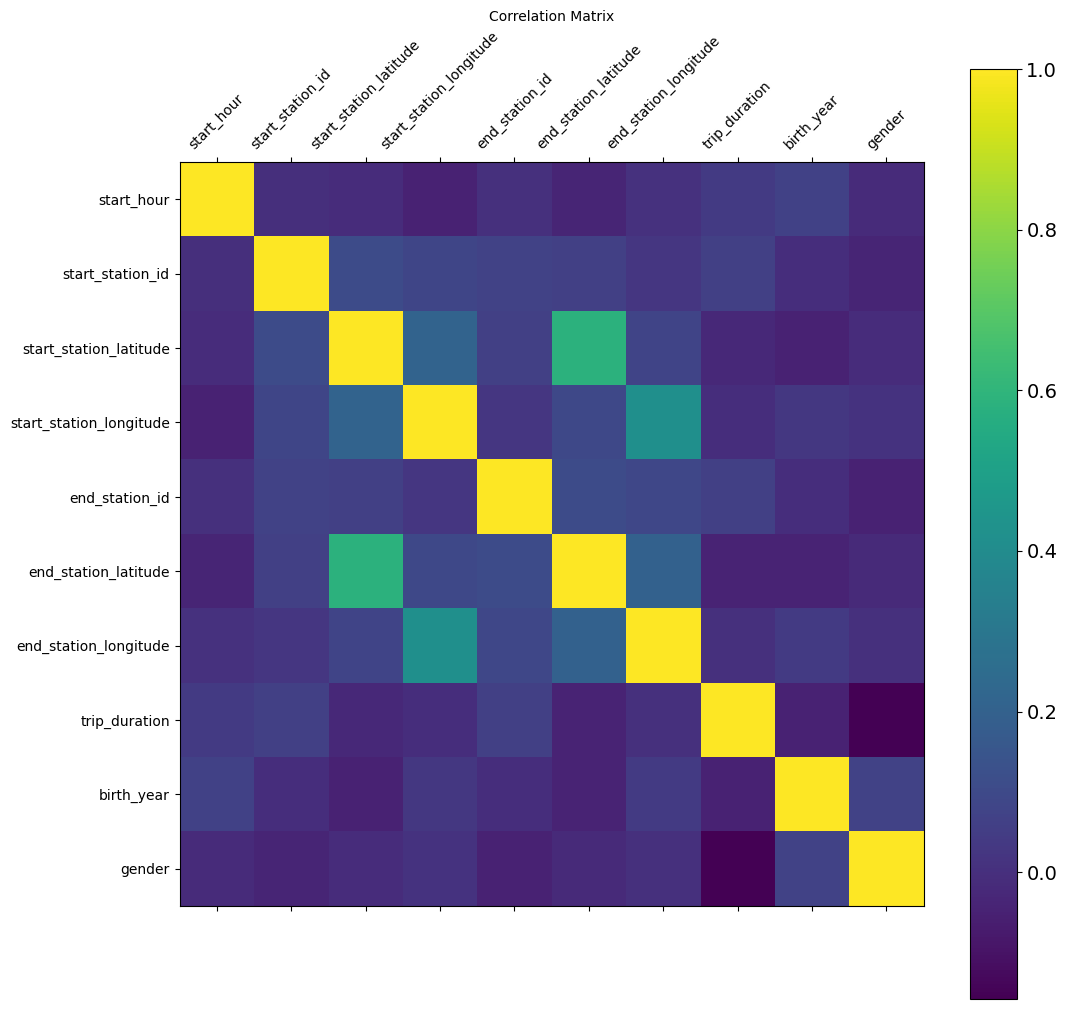

In [22]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(12, 12)) # figure size 
plt.matshow(numeric_df.corr(), fignum=f.number) # type of plot
plt.xticks(range(numeric_df.shape[1]), numeric_df.columns, fontsize=10, rotation=45) # x axis labels
plt.yticks(range(numeric_df.shape[1]), numeric_df.columns, fontsize=10) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=10) # add title

#### Create a correlation heatmap using seaborn:

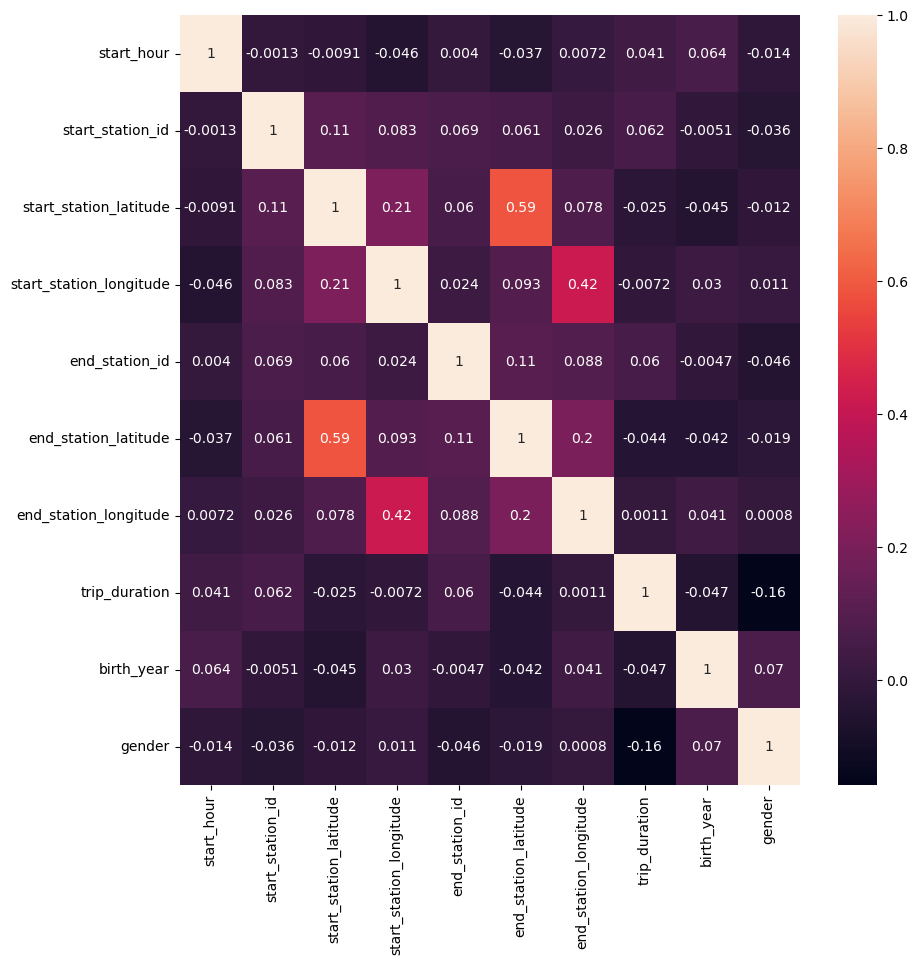

In [23]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(numeric_df.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

### Scatterplots:

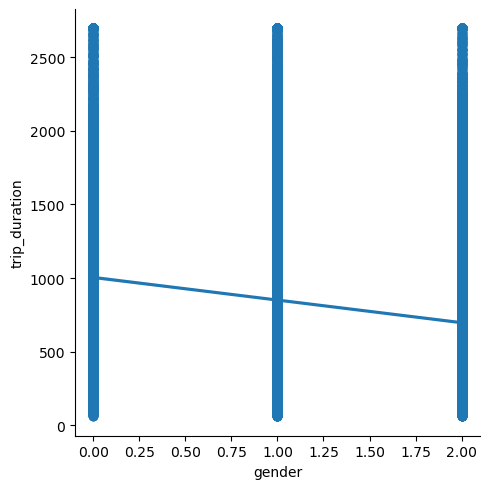

In [24]:
# Create a scatterplot for the "house age" and "price per unit" columns in seaborn

sns.lmplot(x = 'gender', y = 'trip_duration', data = numeric_df)